In [1]:
from graphics import Graph3D, Graph2D, ajuste
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

agua = pd.read_csv("dataframe/Agua1.csv", delimiter=";")
agua.replace([np.inf, -np.inf], np.nan, inplace=True)
agua.dropna(inplace=True)
agua[["theta1", "theta2", "theta3"]] = agua[["theta1", "theta2", "theta3"]] * (np.pi / 180)
agua[["omega1", "omega2", "omega3"]] = agua[["omega1", "omega2", "omega3"]] * (np.pi / 180)

def first_agua(t,gamma,omega,alpha,A):
    return max(agua["theta1"])*np.exp(-gamma * t)*np.cos(omega*t + alpha) + A

def second_agua(t,gamma,omega,alpha,A):
    return max(agua["theta2"])*np.exp(-gamma * t)*np.cos(omega*t + alpha) + A

def third_agua(t,gamma,omega,alpha,A):
    return max(agua["theta3"])*np.exp(-gamma * t)*np.cos(omega*t + alpha) + A

print(max(agua["theta1"]))
print(max(agua["theta2"]))
print(max(agua["theta3"]))

0.16580627893946132
0.1322959573011702
0.08429940287132612


Gráfica guardada en: Graficos\ajuste_graficoc1.png


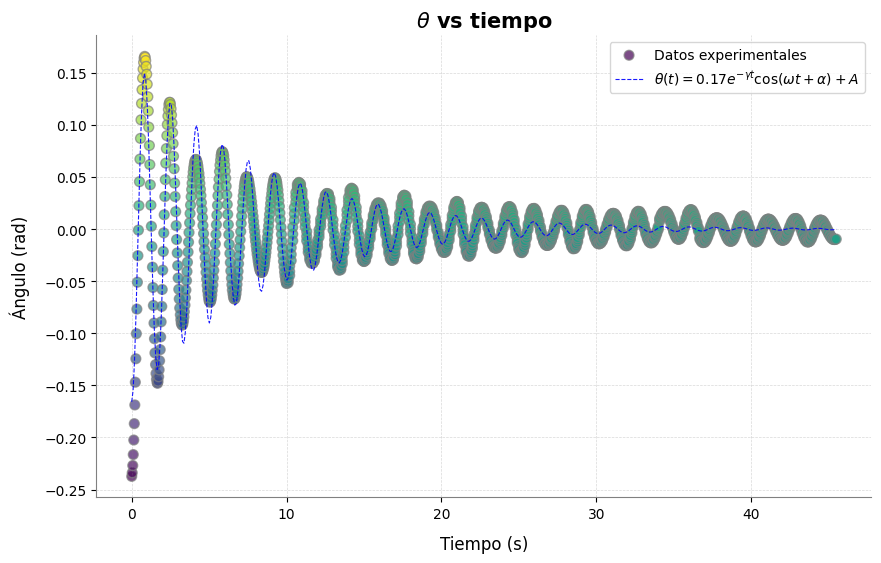

Parámetros ajustados:
Parámetro 1: 0.121
Parámetro 2: -3.753
Parámetro 3: 3.143
Parámetro 4: 0.000


In [2]:
param_1=ajuste(
    x_data=agua["t1"], 
    y_data=agua["theta1"], 
    modelo_func=first_agua, 
    x_label="Tiempo (s)", 
    y_label="Ángulo (rad)", 
    etiqueta=r"$\theta$ vs tiempo", 
    modelo_latex=r"$\theta(t) =  0.17e^{-\gamma t} \cos(\omega t + \alpha) + A$",  # Ejemplo de función en LaTeX
    color_mapa="viridis", 
    p0=[0.1, 1, 0, max(agua["theta1"])],  # Valores iniciales para gamma, omega, alpha, y A
    save_path= rf'Graficos\ajuste_graficoc1.png'
)

Gráfica guardada en: Graficos\ajuste_graficoc2.png


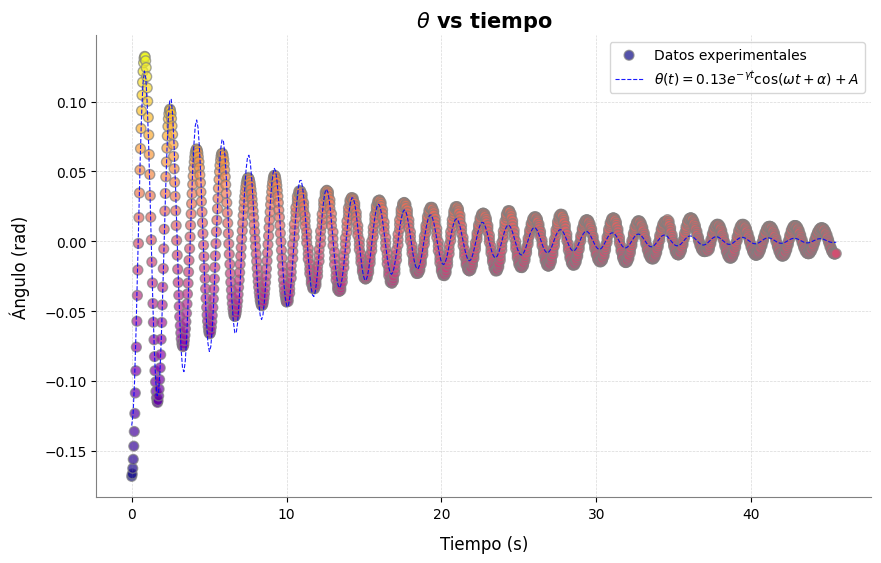

Parámetros ajustados:
Parámetro 1: 0.102
Parámetro 2: -3.744
Parámetro 3: 3.140
Parámetro 4: 0.000


In [3]:
param_2=ajuste(
    x_data=agua["t2"], 
    y_data=agua["theta2"], 
    modelo_func=second_agua, 
    x_label="Tiempo (s)", 
    y_label="Ángulo (rad)", 
    etiqueta=r"$\theta$ vs tiempo", 
    modelo_latex=r"$\theta(t) =  0.13e^{-\gamma t} \cos(\omega t + \alpha) + A$",  # Ejemplo de función en LaTeX
    color_mapa="plasma", 
    p0=[0.1, 1, 0, max(agua["theta2"])], # Valores iniciales para gamma, omega, alpha, y A
    save_path= rf'Graficos\ajuste_graficoc2.png'
)

Gráfica guardada en: Graficos\ajuste_graficoc3.png


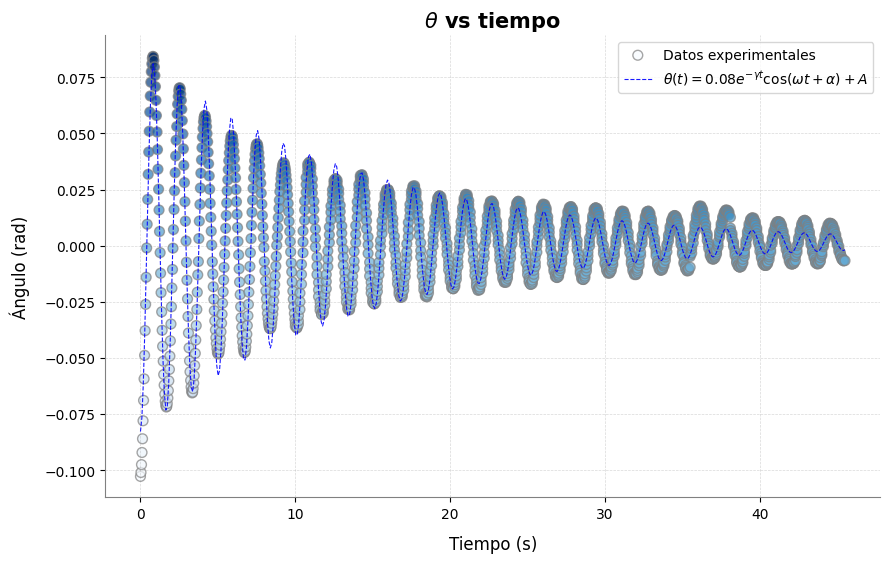

Parámetros ajustados:
Parámetro 1: 0.070
Parámetro 2: -3.737
Parámetro 3: 3.112
Parámetro 4: 0.001


In [4]:
param_3=ajuste(
    x_data=agua["t3"], 
    y_data=agua["theta3"], 
    modelo_func=third_agua, 
    x_label="Tiempo (s)", 
    y_label="Ángulo (rad)", 
    etiqueta=r"$\theta$ vs tiempo", 
    modelo_latex=r"$\theta(t) =  0.08e^{-\gamma t} \cos(\omega t + \alpha) + A$",  # Ejemplo de función en LaTeX
    color_mapa="Blues", 
    p0=[0.1, 1, 0, max(agua["theta3"])],  # Valores iniciales para gamma, omega, alpha, y A
    save_path= rf'Graficos\ajuste_graficoc3.png'
)

Gráfica 3D guardada en: Graficos\ajuste_graficoc4.png


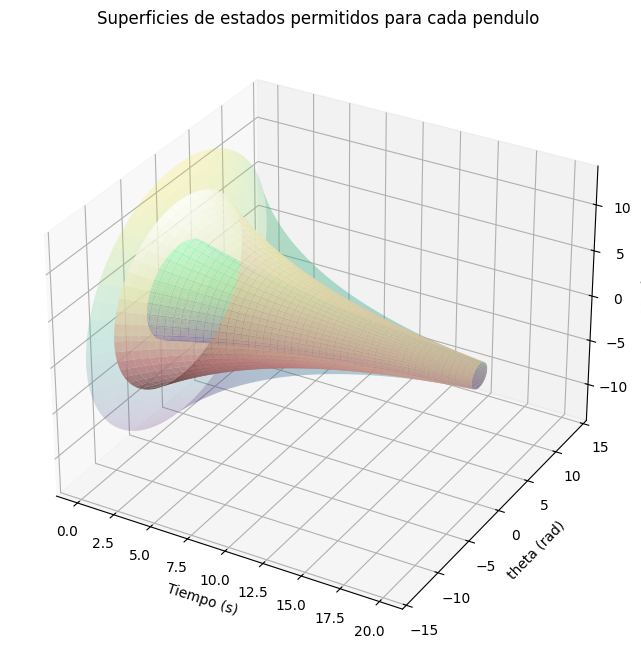

In [5]:

t = np.linspace(0, 20, 100)  # Dominio para t
theta = np.linspace(0, 2 * np.pi, 100)  # Dominio para theta

# Creando una malla
T, Theta = np.meshgrid(t, theta)
z1 = -13.6 * np.exp(-param_1[0] * T)  # z1
z2 = -9.64 * np.exp(-param_2[0] * T)   # z2
z3 = -4.89 * np.exp(-param_3[0] * T)   # z3

# Coordenadas del sólido de revolución
X = T
Y1 = z1 * np.cos(Theta)
Y2 = z2 * np.cos(Theta)
Y3 = z3 * np.cos(Theta)

z1_solid = z1 * np.sin(Theta)
z2_solid = z2 * np.sin(Theta)
z3_solid = z3 * np.sin(Theta)

# Graficar el sólido de revolución
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y1, z1_solid, alpha=0.2, cmap='viridis')
ax.plot_surface(X, Y2, z2_solid, alpha=0.8, cmap='pink')
ax.plot_surface(X, Y3, z3_solid, alpha=1, cmap='winter')


# Etiquetas
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel(rf'theta (rad)')
ax.set_zlabel(rf'omega (rad/s)')  
ax.set_title('Superficies de estados permitidos para cada pendulo')

plt.savefig(rf'Graficos\ajuste_graficoc4.png', format=rf'Graficos\ajuste_graficoc4.png'.split('.')[-1], dpi=300, bbox_inches='tight')
print(f"Gráfica 3D guardada en: {rf'Graficos\ajuste_graficoc4.png'}")

plt.show()

Gráfica 3D guardada en: Graficos\ajuste_graficoc5.png


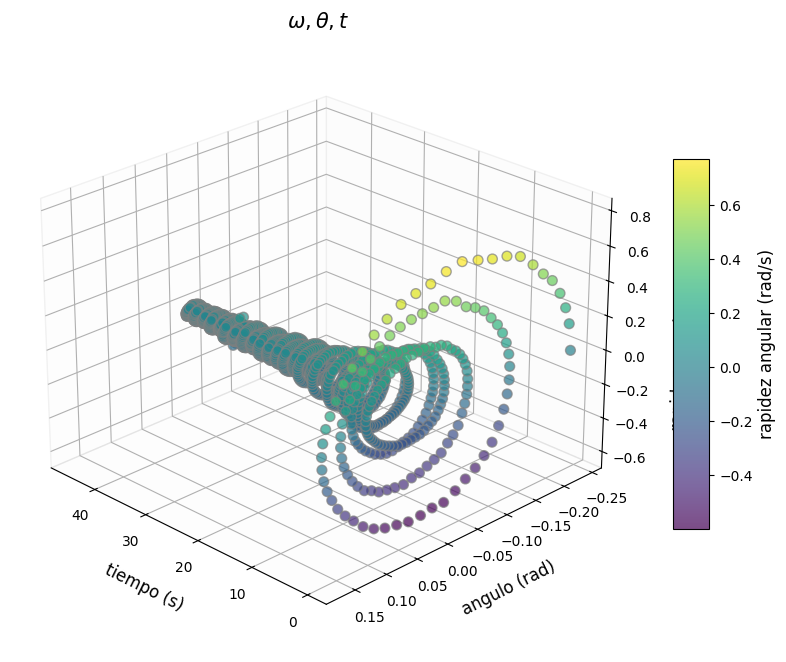

In [6]:
Graph3D(agua["t1"],"tiempo (s)", agua["theta1"],'angulo (rad)', agua["omega1"],'rapidez angular (rad/s)', rf'$\omega,\theta,t$', 'viridis',save_path= rf'Graficos\ajuste_graficoc5.png')

Gráfica 3D guardada en: Graficos\ajuste_graficoc6.png


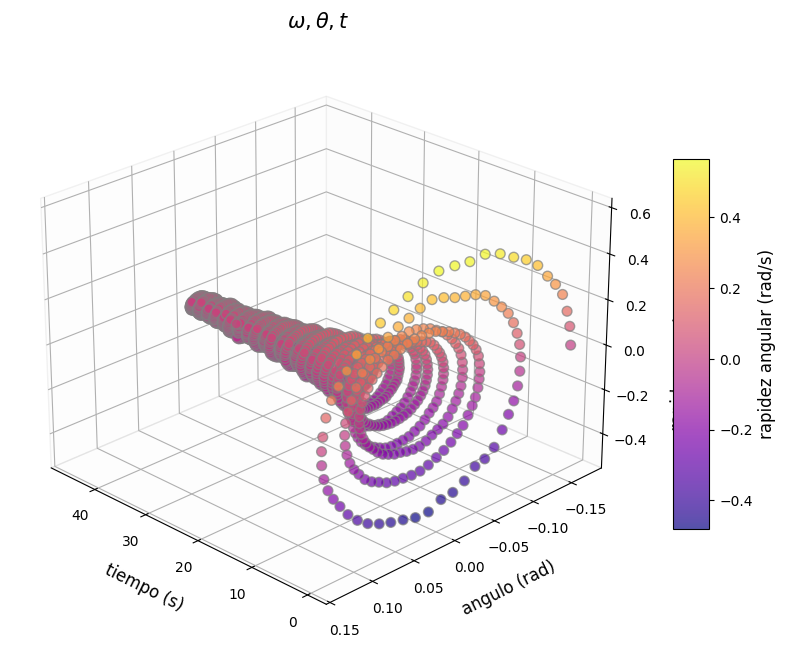

In [7]:
Graph3D(agua["t2"],"tiempo (s)", agua["theta2"],'angulo (rad)', agua["omega2"],'rapidez angular (rad/s)', rf'$\omega,\theta,t$', 'plasma',save_path= rf'Graficos\ajuste_graficoc6.png')

Gráfica 3D guardada en: Graficos\ajuste_graficoc7.png


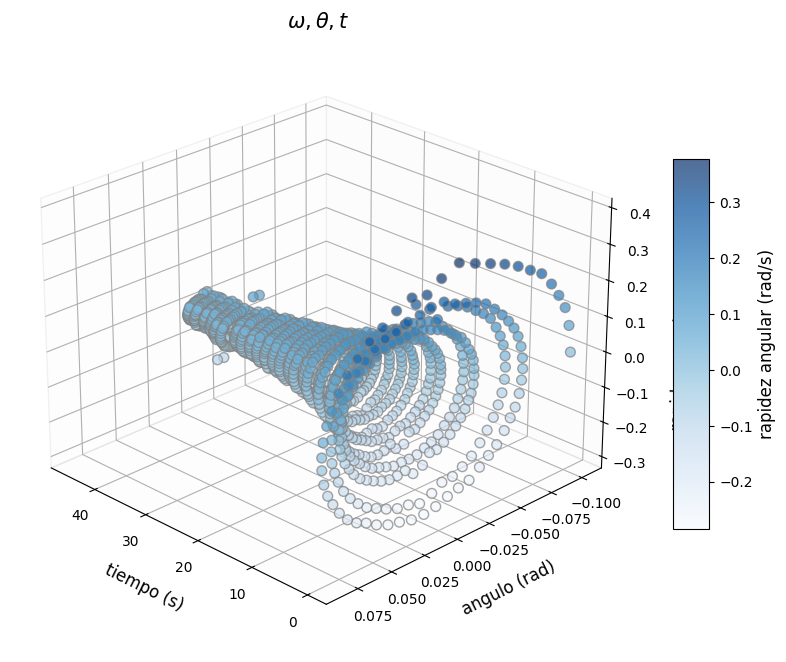

In [8]:
Graph3D(agua["t3"],"tiempo (s)", agua["theta3"],'angulo (rad)', agua["omega3"],'rapidez angular (rad/s)', rf'$\omega,\theta,t$', 'Blues',save_path= rf'Graficos\ajuste_graficoc7.png')